## **Engenharia de recursos e seleção de variáveis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [2]:
#Configuração para poder apresentar todas as linhas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
X_dados_balanceados = pd.read_csv('X_dados_balanceados.csv')

In [4]:
y_dados_balanceados = pd.read_csv('y.csv')

Lembrar que, uma grande quantidade de variáveis de entrada não significa bom desempenho e talvez seja até ruim para o modelo.

Visto isso, com base na análise exploratória e técnicas de seleção de variáveis, vamos selecionar algumas variáveis especificas.

Como exemplo, talvez não seja necessário utilizar todas as colunas de profissão e educação que tornaram-se binárias, talvez seja interessante trabalhar apenas com aquelas que possuem mais impacto, como pode ser o caso das colunas de profissão e educação mais altas, tendo em vista que as pessoas que tem profissão e educação mais relevantes, tenham mais chances de aderir a campanha.

## **Engenharia de recursos**

Já realizamos algumas engenharia de recursos ao transformar colunas catégoricas em colunas binárias, e a partir disso agora também pode-se avaliar quais são relevantes e quais devem ser descartadas.

Com base no que foi analisado na análise exploratória, pode-se pensar em algumas outras variáveis que podem ser criadas através das variáveis que tem mais impacto na aderência da campanha, sendo o caso das variáveis:

* Duração
* Indice de confiança do consumidor
* Campanha anterior

In [5]:
sucesso_aderencia_campanha = X_dados_balanceados.query('aderencia_campanha == 1')
sucesso_aderencia_campanha.head()

,idade,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado
75,41,0,1,0,0,5,1,1575.0,1,999,0,2,93,-36,4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.8,0.5,0.583333
83,49,0,1,0,0,5,1,1042.0,1,999,0,2,93,-36,4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.8,0.5,0.583333
88,49,0,0,0,0,5,1,1467.0,1,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.8,0.5,0.583333
129,41,0,1,0,0,5,1,579.0,1,999,0,2,93,-36,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,0.5,0.583333
139,45,0,1,0,0,5,1,461.0,1,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.8,0.5,0.583333


### **Variável duração**

<AxesSubplot:xlabel='duracao', ylabel='Density'>

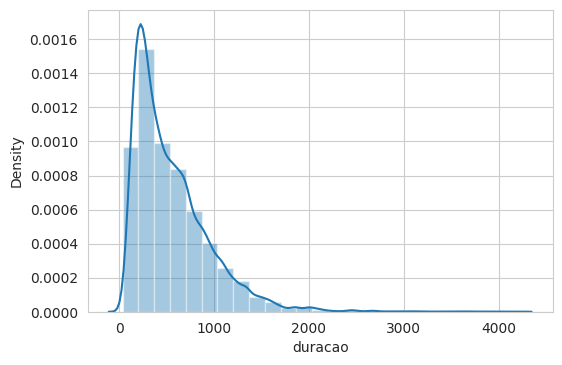

In [6]:
sns.distplot(sucesso_aderencia_campanha['duracao'], bins=25)

Percebe-se que entre 100 a 1000 existe uma alta aderência a campanha, então o que irei fazer é construir uma variável com base nesse intervalo, para que esse intervalo seja entendido como um periodo de sucesso da aderência a campanha.

In [7]:
duracao_100_1000 = X_dados_balanceados.query("duracao > 100 & duracao < 1000")
duracao_100_1000.aderencia_campanha.value_counts()

1    31464
0    26211
Name: aderencia_campanha, dtype: int64

Note que o valor de aderência a campanha acaba sendo maior do que o da não aderência da campanha.

In [8]:
def sucesso_duracao(duracao):
    if (duracao > 100 and duracao < 1000):
        return 1
    else:
        return 0 

In [9]:
X_dados_balanceados['duracao_bem_sucedida'] = X_dados_balanceados.apply(lambda row: sucesso_duracao(row['duracao']), axis='columns')

Se os dados estão no intervalo de duração que foi determinado é retornada a classe binária 1 (como sendo um sucesso).

In [10]:
#Visualizando como os dados a partir do sucesso da regra de duração se comparta quando é aderida a campanha
X_dados_balanceados[(X_dados_balanceados['duracao_bem_sucedida']== 1) & (X_dados_balanceados['aderencia_campanha']==1)].head(5)

,idade,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado,duracao_bem_sucedida
129,41,0,1,0,0,5,1,579.0,1,999,0,2,93,-36,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,0.5,0.583333,1
139,45,0,1,0,0,5,1,461.0,1,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.8,0.5,0.583333,1
182,42,0,1,1,0,5,1,673.0,2,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.8,0.5,0.583333,1
286,39,0,1,0,0,5,1,935.0,3,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.8,0.5,0.583333,1
504,39,0,1,0,0,5,2,918.0,1,999,0,2,93,-36,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333,1


### **Variável campanha anterior**

In [11]:
X_dados_balanceados.head()

,idade,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado,duracao_bem_sucedida
0,56,0,0,0,0,5,1,261.0,1,999,0,2,93,-36,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.8,0.5,0.583333,1
1,57,0,0,0,0,5,1,149.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333,1
2,37,0,1,0,0,5,1,226.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333,1
3,40,0,0,0,0,5,1,151.0,1,999,0,2,93,-36,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.8,0.5,0.583333,1
4,56,0,0,1,0,5,1,307.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333,1


In [12]:
X_dados_balanceados.campanha_anterior.value_counts()

2    54576
1     9949
0     8571
Name: campanha_anterior, dtype: int64

In [13]:
X_dados_balanceados.groupby(['campanha_anterior'])['aderencia_campanha'].sum().sort_values(ascending=False)

campanha_anterior
2    22154
1     9470
0     4924
Name: aderencia_campanha, dtype: int64

Observa-se que como já mencionado na análise exploratória, o fato da campanha anterior não existir pode ter forte influência no resultado da aderência da campanha, por ser a maior classe da variável.

Então o que irei fazer é criar uma variável em que a campanha anterior não tenha existido e que o periodo de duração da campanha seja no intervalo de 100 a 1000 determinado anteriormente.

In [14]:
semCampanhaAnterior_interDuracao = X_dados_balanceados.query("campanha_anterior == 2 & duracao_bem_sucedida == 1")
semCampanhaAnterior_interDuracao.aderencia_campanha.value_counts()

0    23224
1    18104
Name: aderencia_campanha, dtype: int64

In [15]:
def SemCampanhaAnterior_intervalo_duracao(campanha_anterior, intervalo_duracao):
    if (campanha_anterior == 2 and intervalo_duracao == 1):
        return 1
    else:
        return 0 

In [16]:
X_dados_balanceados['semCampanhaAnterior_interDuracao'] = X_dados_balanceados.apply(lambda row: SemCampanhaAnterior_intervalo_duracao(row['campanha_anterior'], row['duracao_bem_sucedida']), axis='columns')

In [17]:
#Visualizando como os dados a partir dessa nova variável se comporta a partir da aderência da campanha
X_dados_balanceados[(X_dados_balanceados['semCampanhaAnterior_interDuracao']== 1) & (X_dados_balanceados['aderencia_campanha']==1)].head(5)

,idade,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado,duracao_bem_sucedida,semCampanhaAnterior_interDuracao
129,41,0,1,0,0,5,1,579.0,1,999,0,2,93,-36,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,0.5,0.583333,1,1
139,45,0,1,0,0,5,1,461.0,1,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.8,0.5,0.583333,1,1
182,42,0,1,1,0,5,1,673.0,2,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.8,0.5,0.583333,1,1
286,39,0,1,0,0,5,1,935.0,3,999,0,2,93,-36,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.8,0.5,0.583333,1,1
504,39,0,1,0,0,5,2,918.0,1,999,0,2,93,-36,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333,1,1


In [18]:
X_dados_balanceados[['aderencia_campanha', 'semCampanhaAnterior_interDuracao', 'duracao_bem_sucedida']].corr()

,aderencia_campanha,semCampanhaAnterior_interDuracao,duracao_bem_sucedida
aderencia_campanha,1.000000,-0.141303,0.17614
semCampanhaAnterior_interDuracao,-0.141303,1.000000,0.58978
duracao_bem_sucedida,0.176140,0.589780,1.00000


Como pode-se observar a regra de variável criada para a quando não existe campanha anterior no intervalo de duração de 100 a 1000, possivelmente não faz tanto sentido para a aderência da campanha, visto a baixa correlação. Por outro lado, a variável de intervalo de duração construída possui uma correlação aceitável com a a aderência da campanha.

## **Seleção de variáveis**

A ideia dessa etapa é diminuir o número de variáveis do conjunto de dados e manter somente aquelas variáveis que são relevantes.

Talvez não seja necessário utilizar todas as colunas de profissão e educação que tornaram-se binárias, talvez seja interessante trabalhar apenas com aquelas que possuem mais impacto, como pode ser o caso das colunas de profissão e educação mais altas, tendo em vista que as pessoas que tem profissão e educação mais relevantes, tenham mais chances de aderir a campanha.

Como também foi visto através do gráfico de correlação, a melhor educação e profissão são as que acabam tendo mais correlação com a aderência da campanha, então algumas variáveis binárias de educação e profissãoque foram criadas acaba não sendo tão necessário.

In [19]:
#importando os pacotes
from yellowbrick.features import FeatureImportances
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier;

Irei agora inicialmente utilizar as variáveis de entrada e a variável de saída que definimos anteriormente e as novas variáveis que foram construídas, para fazer uma seleção dessas variáveis e decidir quais devem permanecer, tendo em vista as que mais podem ter influência na aderência da campanha.

In [20]:
X = X_dados_balanceados.drop(["aderencia_campanha", 'taxa_juros_media', 'indice_confianca_consumidor', 'indice_precos_consumidor'],1)
y = y_dados_balanceados['aderencia_campanha']

### **Yellowbrick**

A biblioteca Yellowbrick possui o atributo FeatureImportances para classificar e plotar as importâncias relativas das variáveis.

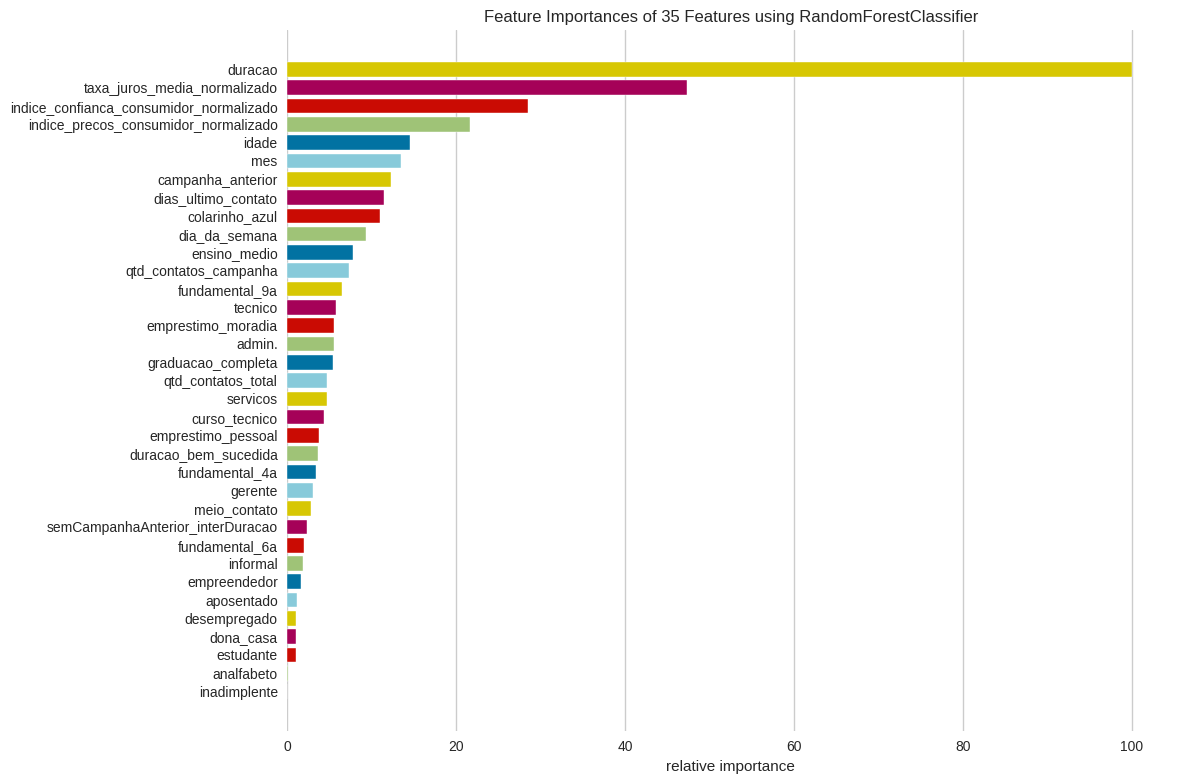

In [21]:
# Gráfico :
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

#Realizando configuração para o gráfico:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Plotando o gráfico:
viz = FeatureImportances(RandomForestClassifier(random_state=0), ax=ax)
viz.fit(X, y)
viz.poof();

### **Recursive feature elimination**

O Recursive Feature Elimination (RFE) é uma técnica para seleção de atributos. Basicamente ele remove recursivamente os atributos e constrói o modelo com os atributos remanescentes. Essa técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo.

O objetivo com o RFE será selecionar 10 variáveis de entrada com base em todas as variáveis presentes no conjunto de dados.

In [22]:
#RFE com Random Forest Classifier para selecionar 10 variáveis relevantes 
randomfc = RandomForestClassifier(random_state=0)
rfe = RFE(randomfc, n_features_to_select= 10)

In [23]:
#Fit nos dados
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=10)

Após treinar O RFE com as variáveis de entrada, pode-se verificar quais são as dez variáveis mais relevantes.

In [24]:
#Visualizando quais foram as 10 variaveis selecionadas
rfe.support_
pd.DataFrame({'coluna': X.columns,
              'bool': rfe.get_support()}).sort_values(by='bool',ascending=False).head(10).reset_index(drop=True)

,coluna,bool
0,idade,True
1,dia_da_semana,True
2,campanha_anterior,True
3,dias_ultimo_contato,True
4,qtd_contatos_campanha,True
5,duracao,True
6,taxa_juros_media_normalizado,True
7,mes,True
8,indice_precos_consumidor_normalizado,True
9,indice_confianca_consumidor_normalizado,True


**Notas**

* A variável **idade** já tinha apresentado um resultado de correlação com a aderência da campanha interessante, então era esperado.


* As variáveis **mes, dia da semana e campanha anterior** não apresentaram bom resultado na correlação realizada na exploração multivariada, porém eu tinha mencionado que poderiam ser muito relevantes e através das duas técnicas aplicadas, provavelmente tem uma forte influência na aderência da campanha.


* Interessante observar que para as duas técnicas aplicadas, a profissão **colarinho azul** se tornou bastante relevante para o resultado do problema que é a aderência da campanha. Mais relevante até que a a profissão admin, que apresentava melhores resultados na aderência da campanha. 



* Uma variável que não foi muito analisada na exploração dos dados e acaba tornando-se relevante é a **dias último contato**, o que não era esperado, mas faz sentido.



* As variáveis **indice de preços e confiança, taxa de juros média** já tinham sido analisadas e foram tratadas cuidadosamente, já com a ideia de que seriam relevantes para o problema, então era esperado. Como tinha mencionado inicialmente, possivelmente eram as variáveis númericas mais importantes.


* A variável **duração** foi a que mais estava claro que tinha uma forte influência no resultado positivo para o problema, e também acaba sendo uma variável muito relevante na aderência da campanha.


A surpresa foi que algumas variáveis apresentaram um resultado de correlação interessante, nas análises exploratórias realizadas aparentava ter uma boa influência para o problema, porém não foram entendidas como variáveis tão relevantes na técnica Yellowbrick e na técnica RFE não apareceu entre as 10 variáveis mais relevantes, sendo elas:

 * Meio de contato
 * Quantidade de contatos totais
 
 
 Além disso, as variáveis de emprestimos também acabaram ficando de lado, apesar da variável emprestimo moradia não está tão ruim com a técnica de Yellowbrick.

## **Conclusões**

A partir do resultado das técnicas de seleção de variáveis recursive feature elimination e Yellowbrick, já consigo entender melhor quais variáveis de fato são relevantes e definir meus dados de entrada.

Então serão usadas como variáveis de entrada todas as 10 variáveis que o recursive feature elimination selecionou, tendo em vista que também aparecem nas primeiras posições de variáveis relevantes da técnia Yellowbrick. Porém, além dessas variáveis, irei inserir algumas que com o resultado do yellowbrick e análise exploratória parecem também serem variáveis interessantes para o problema, sendo elas:

* Ensino médio
* Quantidade contatos campanha
* Graduação completa
* Emprestimo moradia

In [25]:
X_select = X.columns[rfe.support_]
X_select

Index(['idade', 'mes', 'dia_da_semana', 'duracao', 'qtd_contatos_campanha',
       'dias_ultimo_contato', 'campanha_anterior',
       'taxa_juros_media_normalizado', 'indice_precos_consumidor_normalizado',
       'indice_confianca_consumidor_normalizado'],
      dtype='object')

In [26]:
X_select = X_dados_balanceados[['idade', 'mes', 'dia_da_semana', 'duracao', 'qtd_contatos_campanha',
       'dias_ultimo_contato', 'campanha_anterior',
       'taxa_juros_media_normalizado', 'indice_precos_consumidor_normalizado',
       'indice_confianca_consumidor_normalizado']].copy()

In [27]:
X_select[['ensino_medio', 'qtd_contatos_campanha', 'graduacao_completa', 'emprestimo_moradia']] = X_dados_balanceados[['ensino_medio', 'qtd_contatos_campanha', 'graduacao_completa', 'emprestimo_moradia']].copy()

In [28]:
#Salvando os dados de entrada finais
X_select.to_csv("X.csv",index= False)